# **SHELTER ANIMAL OUTCOMES PREDICTIONS **

In this notebook you will see the data analysis, feature engineerings and modeling for shelter animal outcomes predictions, which is a competition of Kaggle. This competition aims to predict the outcome for each animal by using a dataset from **Austin Animal Center**. These insights could help shelters focus their energy on specific animals who need a little extra help finding a new home.

**CONTENT:**
1. Exploratory Data Analysis
2. Feature Engineering
3. Modelling 


# **1. EXPLORATORY DATA ANALYSIS**

In [1]:
#necessary imports
!pip install pandas plotnine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from plotnine import *
%matplotlib inline

  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0


In [4]:
#loading train & test data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head(3)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White


In [5]:
test.head(3)

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby


In [6]:
train.describe()


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A684845,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [7]:
print("OutcomeType:\n",train.OutcomeType.unique())
print("\nAnimalType:\n",train.AnimalType.unique())
print("\nSexuponOutcome:\n",train.SexuponOutcome.unique())
print("\nAgeuponOutcome:",train.AgeuponOutcome.unique())

OutcomeType:
 ['Return_to_owner' 'Euthanasia' 'Adoption' 'Transfer' 'Died']

AnimalType:
 ['Dog' 'Cat']

SexuponOutcome:
 ['Neutered Male' 'Spayed Female' 'Intact Male' 'Intact Female' 'Unknown'
 nan]

AgeuponOutcome: ['1 year' '2 years' '3 weeks' '1 month' '5 months' '4 years' '3 months'
 '2 weeks' '2 months' '10 months' '6 months' '5 years' '7 years' '3 years'
 '4 months' '12 years' '9 years' '6 years' '1 weeks' '11 years' '4 weeks'
 '7 months' '8 years' '11 months' '4 days' '9 months' '8 months'
 '15 years' '10 years' '1 week' '0 years' '14 years' '3 days' '6 days'
 '5 days' '5 weeks' '2 days' '16 years' '1 day' '13 years' nan '17 years'
 '18 years' '19 years' '20 years']


**"OutcomeType"** column is our target feature and contains 5 different outcomes for animals. Also, we see that almost all the columns have categorical values. Datasets contains only two types of animals, cat & dog. **"AgeuponOutcome"** feature are given in different time units so needs to arrange. **"SexuponOutcome"** feature includes interfility information as well as sex information. Also we see **"Breed"** & **"Color"** columns contain severel unique values. Now let check the null values.

<AxesSubplot:>

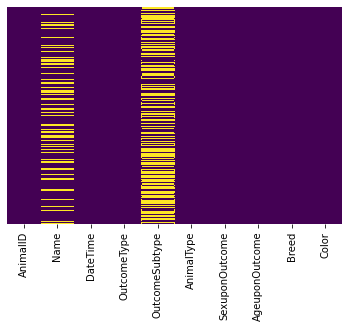

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
print("Null percentage of Name:",train["Name"].isna().sum()/train["Name"].shape[0])
print("Null percentage of OutcomeSubtype:",train["OutcomeSubtype"].isna().sum()/train["OutcomeSubtype"].shape[0])

Null percentage of Name: 0.2877399079651315
Null percentage of OutcomeSubtype: 0.5092596056717423


We see **"Name"** feature includes **28 percent** of null values, we will regulate this feature later. Also **"OutcomeSubtype"** feature includes **50 percent** of null values. Since this feature is not included in test column and so related with our target feature "OutcomeType", we will drop it.


In [10]:
#to work easier rename the column names

train.rename(columns={'AnimalID' :'ID','Name':'name', 'DateTime':'date','OutcomeType':'target','OutcomeSubtype':'subtype','AnimalType':'animal','SexuponOutcome':'sex','AgeuponOutcome':'age','Breed':'breed','Color':'color'}, inplace=True) 
test.rename(columns={'Name':'name', 'DateTime':'date','AnimalType':'animal','SexuponOutcome':'sex','AgeuponOutcome':'age','Breed':'breed','Color':'color'}, inplace=True) 

Now, for better understanding let's look at the relations of some features with target column.

<AxesSubplot:xlabel='target', ylabel='count'>

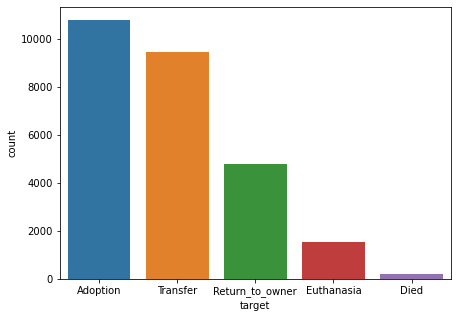

In [11]:
plt.figure(figsize=(7,5))
sns.countplot(x=train.target, order=['Adoption','Transfer','Return_to_owner','Euthanasia','Died'])

We see euthanasia and died outcomes are very less wrt others.

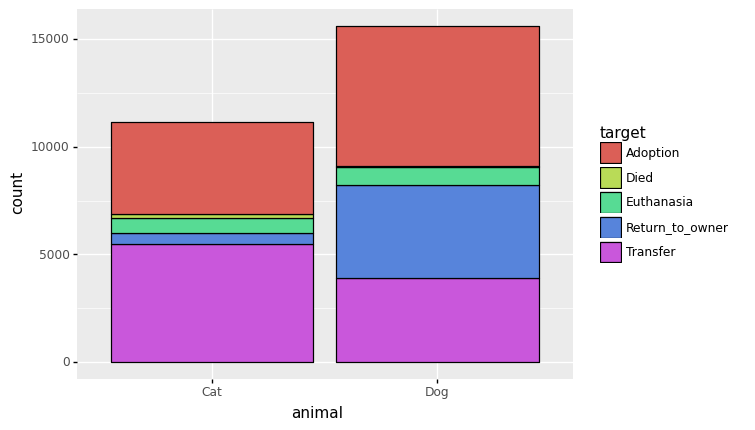

<ggplot: (161871557443)>

In [12]:
ggplot(train, aes(x='animal', fill='target')) + geom_bar(colour='black') + labs(y='count')

In this graph we see number of cats is  less than number of dogs in the dataset and outcome types have different patterns in terms of cats and dogs. While "transfer" and "died" outcomes are higher for cats, "return_to_owner" and "adoption" outcomes are higher for dogs.

<AxesSubplot:xlabel='sex', ylabel='count'>

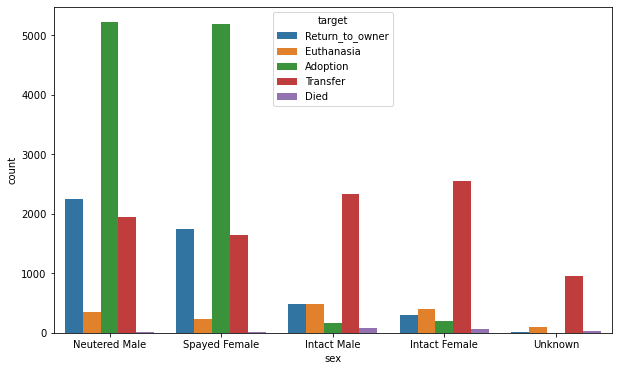

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='sex',data=train,hue='target')

In this plot we see the distribution of outcomes on sex feature and notice that infertility has a great impact on **"adoption"** and **"return_to_owner"** outcomes. So we will regulate this feature in terms of infertility and sex separately.

For other features we cannot see the relation with target column without regulate them.So we will do some feature engineerings and than check their relations with target column.

# **2. FEATURE ENGINEERING**

In this part of the notebook we will do some feature engineerings for our features and prepare them to model. After my studies, I decided to split both training and test dataset into cats and dog, and do regulations separately then train for each cat/dog dataset. We will use these two classifier to predict the outcome for the test dataset and combine the results finally. We will do this splitting because dogs and cats have different tendencies, so I observed models learn better in this way. Also I will do some feature engineerings to the dogs dataset that does not belong in cats dataset.


In [14]:
train_dog = train.loc[train.animal == 'Dog']
train_cat = train.loc[train.animal == 'Cat']

test_dog = test.loc[test.animal == 'Dog']
test_cat = test.loc[test.animal == 'Cat']

**AGE**

In [15]:
print("\nAgeuponOutcome:",train.age.unique())


AgeuponOutcome: ['1 year' '2 years' '3 weeks' '1 month' '5 months' '4 years' '3 months'
 '2 weeks' '2 months' '10 months' '6 months' '5 years' '7 years' '3 years'
 '4 months' '12 years' '9 years' '6 years' '1 weeks' '11 years' '4 weeks'
 '7 months' '8 years' '11 months' '4 days' '9 months' '8 months'
 '15 years' '10 years' '1 week' '0 years' '14 years' '3 days' '6 days'
 '5 days' '5 weeks' '2 days' '16 years' '1 day' '13 years' nan '17 years'
 '18 years' '19 years' '20 years']


In [16]:
#since age column contains different time units, convert them to month
def age_month(x):
  x = str(x)
  if x == 'nan':
    return 0
  age = int(x.split()[0])
  if x.find('year') > -1:
    return age * 12
  if x.find('month') > -1:
    return age
  if x.find('week') > -1:
    return age // 4
  if x.find('day') > -1:
    return age // 30
  else:
    return 0 

train_dog['age'] = train_dog.age.apply(age_month)
train_cat['age'] = train_cat.age.apply(age_month)
test_dog['age'] = test_dog.age.apply(age_month)
test_cat['age'] = test_cat.age.apply(age_month)


#age in less than 1 month
def age_less1month(x):
  if x >= 0 and x<= 1:
    return 'yes'
  else:
    return 'no' 

#age in between 2 years and 10 years
def age_2_10(x):
  if x >= 24 and x<= 120:
    return 'yes'
  else:
    return 'no' 

#age in greater than 10 years
def age_10plus(x):
  if x > 120:
    return 'yes'
  else:
    return 'no' 

train_dog['less_1month'] = train_dog.age
train_dog['less_1month'] = train_dog.less_1month.apply(age_less1month)
train_cat['less_1month'] = train_cat.age
train_cat['less_1month'] = train_cat.less_1month.apply(age_less1month)

test_cat['less_1month'] = test_cat.age
test_cat['less_1month'] = test_cat.less_1month.apply(age_less1month)
test_dog['less_1month'] = test_dog.age
test_dog['less_1month'] = test_dog.less_1month.apply(age_less1month)


train_cat['age_2_10'] = train_cat.age
train_cat['age_2_10'] = train_cat.age_2_10.apply(age_2_10)
train_dog['age_2_10'] = train_dog.age
train_dog['age_2_10'] = train_dog.age_2_10.apply(age_2_10)

test_cat['age_2_10'] = test_cat.age
test_cat['age_2_10'] = test_cat.age_2_10.apply(age_2_10)
test_dog['age_2_10'] = test_dog.age
test_dog['age_2_10'] = test_dog.age_2_10.apply(age_2_10)

train_cat['age_10plus'] = train_cat.age
train_cat['age_10plus'] = train_cat.age_10plus.apply(age_10plus)
train_dog['age_10plus'] = train_dog.age
train_dog['age_10plus'] = train_dog.age_10plus.apply(age_10plus)

test_cat['age_10plus'] = test_cat.age
test_cat['age_10plus'] = test_cat.age_10plus.apply(age_10plus)
test_dog['age_10plus'] = test_dog.age
test_dog['age_10plus'] = test_dog.age_10plus.apply(age_10plus)


#categorize dog ages wrt dog age scale
def age_dog(x):
  if x == 0:
    return 'unknown'
  elif (x>0 and x<7):
    return 'new born'
  elif (x>6 and x<25):
    return 'junior'
  elif (x>24 and x<37):
    return 'prime'
  elif (x>36 and x<73):
    return 'mature'
  elif (x>72 and x<121):
    return 'senior'
  elif x>120:
    return 'geriatric'


#categorize cat ages wrt cat age scale
def age_cat(x):
  if x == 0:
    return 'unknown'
  elif (x>0 and x<7):
    return 'new born'
  elif (x>6 and x<37):
    return 'junior'
  elif (x>36 and x<85):
    return 'prime'
  elif (x>84 and x<133):
    return 'mature'
  elif (x>132 and x<181):
    return 'senior'
  elif x>180:
    return 'geriatric'

train_dog['age'] = train_dog.age.apply(age_dog)
train_cat['age'] = train_cat.age.apply(age_cat)

test_dog['age'] = test_dog.age.apply(age_dog)
test_cat['age'] = test_cat.age.apply(age_cat)




<AxesSubplot:xlabel='target', ylabel='count'>

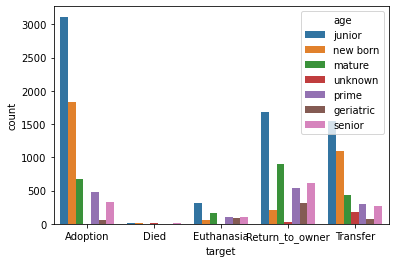

In [17]:
sns.countplot(data=train_dog, x=train_dog.target, hue=train_dog.age,order=['Adoption','Died','Euthanasia','Return_to_owner','Transfer'])

<AxesSubplot:xlabel='target', ylabel='count'>

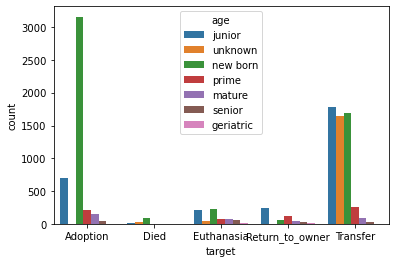

In [18]:
sns.countplot(data=train_cat, x=train_cat.target, hue=train_cat.age,order=['Adoption','Died','Euthanasia','Return_to_owner','Transfer'])

As we see here age scales have different tendencies for dogs and cats. For example, for adoption outcome while new born is high for cats, junior is high for dogs. Now lets convert these categorical values to numeric values.

In [19]:
#assign categorical scales to the numbers
age_list = {'new born':1, 'junior':2, 'prime':3, 'mature':4, 'senior':5, 'geriatric':6, 'unknown':7 }

train_dog['age'] = train_dog.age.map(age_list)
train_cat['age'] = train_cat.age.map(age_list)

test_dog['age'] = test_dog.age.map(age_list)
test_cat['age'] = test_cat.age.map(age_list)

train_cat.head(1)

,ID,name,date,target,subtype,animal,sex,age,breed,color,less_1month,age_2_10,age_10plus
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,2,Domestic Shorthair Mix,Cream Tabby,no,no,no


In [20]:
train_dog.head(1)

,ID,name,date,target,subtype,animal,sex,age,breed,color,less_1month,age_2_10,age_10plus
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,2,Shetland Sheepdog Mix,Brown/White,no,no,no


For age column, we take the **0-1 month**, **2-10 years** and **10+ years** age periods because for "died" and "euthanasia" outcomes these periods have critical roles. And convert numerical values for age column with respect to **age scales** of cats and dogs.

**BREED**

In [21]:
train.breed.value_counts()

Domestic Shorthair Mix          8810
Pit Bull Mix                    1906
Chihuahua Shorthair Mix         1766
Labrador Retriever Mix          1363
Domestic Medium Hair Mix         839
                                ... 
Boxer/German Shepherd              1
Australian Shepherd/Pit Bull       1
Border Terrier                     1
Pit Bull/Chow Chow                 1
Black Mouth Cur/Basset Hound       1
Name: breed, Length: 1380, dtype: int64

In [22]:
#agrressive dog breeds (appliying only dogs dataset)
def aggressive(breed):
		if breed.find("Pit Bull") != -1:
			return 1
		elif breed.find("Rottweiler") != -1:
			return 2
		elif breed.find("Husky") != -1:
			return 3
		elif breed.find("Shepherd") != -1:
			return 4
		elif breed.find("Malamute") != -1:
			return 5
		elif breed.find("Doberman") != -1:
			return 6
		elif breed.find("Chow") != -1:
			return 7
		elif breed.find("Dane") != -1:
			return 8
		elif breed.find("Boxer") != -1:
			return 9
		elif breed.find("Akita") != -1:
			return 10
		else:
			return 11
    
train_dog["aggresive"] = train_dog["breed"].apply(aggressive)
test_dog["aggresive"] = test_dog["breed"].apply(aggressive)


#allergic dog breeds (appliying only dogs dataset)
def allergic(breed):
		if breed.find("Akita") != -1:
			return 1
		elif breed.find("Malamute") != -1:
			return 2
		elif breed.find("Eskimo") != -1:
			return 3
		elif breed.find("Corgi") != -1:
			return 4
		elif breed.find("Chow") != -1:
			return 5
		elif breed.find("Shepherd") != -1:
			return 6
		elif breed.find("Pyrenees") != -1:
			return 7
		elif breed.find("Labrador") != -1:
			return 8
		elif breed.find("Retriever") != -1:
			return 9
		elif breed.find("Husky") != -1:
			return 10
		else:
			return 11
    
train_dog["allergic"] = train_dog["breed"].apply(allergic)
test_dog["allergic"] = test_dog["breed"].apply(allergic)


#hair group classification
def hair_group(breed):
		if breed.find("Shorthair") != -1:
			return 0
		elif breed.find("Longhair") != -1:
			return 1
		else:
			return 2

train_cat["hairgroup"] = train_cat["breed"].apply(hair_group)
train_dog["hairgroup"] = train_dog["breed"].apply(hair_group)

test_cat["hairgroup"] = test_cat["breed"].apply(hair_group)
test_dog["hairgroup"] = test_dog["breed"].apply(hair_group)



#breed group classification - mix breed / or not
def breed_group(breed_input):
		breed = str(breed_input)
		if (' ' in breed) == False:
			br =  breed 
		else:
			breed_list = breed.split()
			try:
				br = breed_list[2] 
			except:
				br = breed_list[1] 
		if (br == "Mix"):
			return 0
		else:
			return 1
		return 1

train_dog["mix"] = train_dog["breed"].apply(breed_group)
train_cat["mix"] = train_cat["breed"].apply(breed_group)

test_cat["mix"] = test_cat["breed"].apply(breed_group)
test_dog["mix"] = test_dog["breed"].apply(breed_group)



#top dog and cat breeds 
dog_max = ['Pit Bull','Chihuahua Shorthair','Labrador Retriever','German Shepherd','Australian Cattle Dog','Dachshund','Boxer','Miniature Poodle','Border Collie','Australian Shepherd','Rat Terrier','Siberian Husky','Yorkshire Terrier','Catahoula','Jack Russell Terrier','Miniature Schnauzer','Shih Tzu','Rottweiler','Chihuahua Longhair','Beagle','American Bulldog','Cairn Terrier','American Staffordshire Terrier','Staffordshire','Australian Kelpie','Great Pyrenees']
cat_max = ['Domestic Shorthair','Domestic Medium Hair','Domestic Longhair','Siamese']


def dog_breed(x):
		x = str(x)
		if x in dog_max:
			return x
		else:
			return 'other'            

train_dog['breed'] = train_dog.breed.apply(dog_breed)
test_dog['breed'] = test_dog.breed.apply(dog_breed)


def cat_breed(x):
		x = str(x)
		if x in cat_max:
			return x
		else:
			return 'other'

train_cat['breed'] = train_cat.breed.apply(cat_breed)
test_cat['breed'] = test_cat.breed.apply(cat_breed)

train_cat.head(1)

,ID,name,date,target,subtype,animal,sex,age,breed,color,less_1month,age_2_10,age_10plus,hairgroup,mix
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,2,other,Cream Tabby,no,no,no,0,0


In [23]:
train_dog.head(1)

,ID,name,date,target,subtype,animal,sex,age,breed,color,less_1month,age_2_10,age_10plus,aggresive,allergic,hairgroup,mix
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,2,other,Brown/White,no,no,no,11,11,2,0


For breed column, we take **"aggressive"** and **"allergic"** features for dogs. Also for both animals we take **"hairgroup"** feature which includes long hair/short hair/other. And we check the breeds mix or not and convert it into **"mix"** column. And finally, we determine the most **popular breeds** for both and convert them into this.

**COLOR**

In [24]:
train.color.value_counts()

Black/White               2824
Black                     2292
Brown Tabby               1635
Brown Tabby/White          940
White                      931
                          ... 
Brown Tabby/Gray Tabby       1
Yellow/Yellow                1
Red Tick/Brown Merle         1
Torbie/Calico                1
Chocolate/Cream              1
Name: color, Length: 366, dtype: int64

In [25]:
#extract color in terms or solid or not
def extract_color(df):
    df['IsSolidColor'] = 1
    mixed_entries = df['color'].str.contains(r'\/')
    df.loc[mixed_entries, 'IsSolidColor'] = 0
    df['color'] = df['color'].str.replace('\/.*', '')
    return df

train_cat = extract_color(train_cat)
train_dog = extract_color(train_dog)

test_cat = extract_color(test_cat)
test_dog = extract_color(test_dog)


#label encoding for cat colors
le_color = preprocessing.LabelEncoder()
train_cat.color = le_color.fit_transform(train_cat.color)
test_cat.color = le_color.fit_transform(test_cat.color)

#label encoding for cat colors
le_color = preprocessing.LabelEncoder()
train_dog.color = le_color.fit_transform(train_dog.color)
test_dog.color = le_color.fit_transform(test_dog.color)

train_cat.head(1) 

,ID,name,date,target,subtype,animal,sex,age,breed,color,less_1month,age_2_10,age_10plus,hairgroup,mix,IsSolidColor
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,2,other,19,no,no,no,0,0,1


In [26]:
train_dog.head(1)

,ID,name,date,target,subtype,animal,sex,age,breed,color,less_1month,age_2_10,age_10plus,aggresive,allergic,hairgroup,mix,IsSolidColor
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,2,other,11,no,no,no,11,11,2,0,0


For **color** feature, we take **"IsSolidColor"** with respect to feature is contains 1 color or more. And do **label encoding** for color column.

**SEX**

In [27]:
#filling null values
train_dog.sex.fillna('Unknown', inplace=True)

#categorize for infertility
def intact_group(sex):
		try:
			intact_type = sex.split()
		except:
			return 0
		if intact_type[0] == "Neutered" or intact_type[0] ==  "Spayed":		
			return 1
		elif intact_type[0] == "Intact":
			return 2
		else:
			return 0

train_cat["virginity"] = train_cat["sex"].apply(intact_group)
train_dog["virginity"] = train_dog["sex"].apply(intact_group)

test_cat["virginity"] = test_cat["sex"].apply(intact_group)
test_dog["virginity"] = test_dog["sex"].apply(intact_group)


#categorize for male/female
def sex_group(sexs):
		try:
			sex_type = sexs.split()
		except:
			return 0
		#categorize
		if sex_type[0] == "Unknown":
			return 0
		elif sex_type[1] == "Male":
			return 1
		elif sex_type[1] == "Female":
			return 2
		else:
			return 0
        
train_cat["sex_"] = train_cat["sex"].apply(sex_group)
train_dog["sex_"] = train_dog["sex"].apply(sex_group)

test_cat["sex_"] = test_cat["sex"].apply(sex_group)
test_dog["sex_"] = test_dog["sex"].apply(sex_group)

train_cat.head(1)

,ID,name,date,target,subtype,animal,sex,age,breed,color,less_1month,age_2_10,age_10plus,hairgroup,mix,IsSolidColor,virginity,sex_
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,2,other,19,no,no,no,0,0,1,1,2


In [28]:
train_dog.head(1)

,ID,name,date,target,subtype,animal,sex,age,breed,color,less_1month,age_2_10,age_10plus,aggresive,allergic,hairgroup,mix,IsSolidColor,virginity,sex_
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,2,other,11,no,no,no,11,11,2,0,0,1,1


**NAME**

In [29]:
#categorize name: has name/or not
def name(x):
  x = str(x)
  if x == 'nan':
    return 0
  else:
    return 1

train_cat['name'] = train_cat.name.apply(name)
train_dog['name'] = train_dog.name.apply(name)

test_cat['name'] = test_cat.name.apply(name)
test_dog['name'] = test_dog.name.apply(name)

train_cat.head(1)

,ID,name,date,target,subtype,animal,sex,age,breed,color,less_1month,age_2_10,age_10plus,hairgroup,mix,IsSolidColor,virginity,sex_
1,A656520,1,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,2,other,19,no,no,no,0,0,1,1,2


In [30]:
train_dog.head(1)

,ID,name,date,target,subtype,animal,sex,age,breed,color,less_1month,age_2_10,age_10plus,aggresive,allergic,hairgroup,mix,IsSolidColor,virginity,sex_
0,A671945,1,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,2,other,11,no,no,no,11,11,2,0,0,1,1


<AxesSubplot:xlabel='name', ylabel='count'>

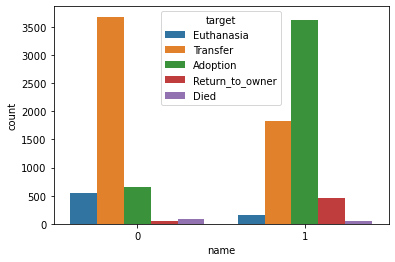

In [31]:
sns.countplot(x='name', data=train_cat, hue='target')

<AxesSubplot:xlabel='name', ylabel='count'>

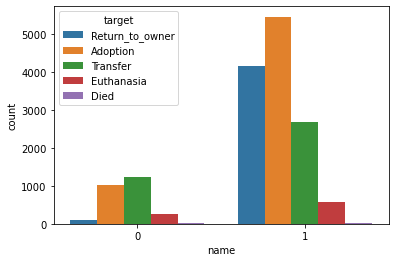

In [32]:
sns.countplot(x='name', data=train_dog, hue='target')

For "name" column, we convert 1/0 with respect to has_name/or_not for each animals. And on the graph we see having name is important for the outcomes "return to owner" and "adoption". 

**TARGET**

In [33]:
#converting target features to numbers
target_list = {'Adoption':1, 'Died':2, 'Euthanasia':3, 'Return_to_owner':4, 'Transfer':5}

train_dog['target'] = train_dog.target.map(target_list)
train_cat['target'] = train_cat.target.map(target_list)

For **"target"** column we convert the categorical values to numeric values with respect to alphabetical order.

**DATE**

In [34]:
#taking date units from datetime column for cats
train_cat.date = pd.to_datetime(train_cat.date)
train_cat["dayofweek"] = train_cat.date.dt.dayofweek
train_cat["month"] = train_cat.date.dt.month
train_cat["year"] = train_cat.date.dt.year
train_cat["hour"] = train_cat.date.dt.hour
train_cat["minute"] = train_cat.date.dt.minute

test_cat.date = pd.to_datetime(test_cat.date)
test_cat["dayofweek"] = test_cat.date.dt.dayofweek
test_cat["month"] = test_cat.date.dt.month
test_cat["year"] = test_cat.date.dt.year
test_cat["hour"] = test_cat.date.dt.hour
test_cat["minute"] = test_cat.date.dt.minute

#taking date units from datetime column for dogs
train_dog.date = pd.to_datetime(train_dog.date)
train_dog["dayofweek"] = train_dog.date.dt.dayofweek
train_dog["month"] = train_dog.date.dt.month
train_dog["year"] = train_dog.date.dt.year
train_dog["hour"] = train_dog.date.dt.hour
train_dog["minute"] = train_dog.date.dt.minute

test_dog.date = pd.to_datetime(test_dog.date)
test_dog["dayofweek"] = test_dog.date.dt.dayofweek
test_dog["month"] = test_dog.date.dt.month
test_dog["year"] = test_dog.date.dt.year
test_dog["hour"] = test_dog.date.dt.hour
test_dog["minute"] = test_dog.date.dt.minute

#mapping years to numbers
year_list = {2013 : 1, 2014 : 2, 2015 : 3, 2016:4}
train_cat['year'] = train_cat.year.map(year_list)
train_dog['year'] = train_dog.year.map(year_list)

test_cat['year'] = test_cat.year.map(year_list)
test_dog['year'] = test_dog.year.map(year_list)

train_cat.head(1)

,ID,name,date,target,subtype,animal,sex,age,breed,color,...,hairgroup,mix,IsSolidColor,virginity,sex_,dayofweek,month,year,hour,minute
1,A656520,1,2013-10-13 12:44:00,3,Suffering,Cat,Spayed Female,2,other,19,...,0,0,1,1,2,6,10,1,12,44


In [35]:
train_dog.head(1)

,ID,name,date,target,subtype,animal,sex,age,breed,color,...,hairgroup,mix,IsSolidColor,virginity,sex_,dayofweek,month,year,hour,minute
0,A671945,1,2014-02-12 18:22:00,4,NaN,Dog,Neutered Male,2,other,11,...,2,0,0,1,1,2,2,2,18,22


For **"date"** column we take the **"dayofweek"**, **"month"**, **"year"**, **"hour"**, **"minute"** values and convert year column to digits.

# **3. MODELLING**

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
X_cat = train_cat.drop(['ID', 'date', 'target', 'subtype', 'animal','sex'], axis=1)
Y_cat = train_cat['target']

from sklearn.model_selection import train_test_split
X_cat = pd.get_dummies(X_cat)
X_train_cat, X_test_cat, Y_train_cat, Y_test_cat = train_test_split(X_cat, Y_cat, test_size = 0.33, random_state=0)


X_dog = train_dog.drop(['ID', 'date', 'target', 'subtype', 'animal','sex'], axis=1)
Y_dog = train_dog['target']

from sklearn.model_selection import train_test_split
X_dog = pd.get_dummies(X_dog)
X_train_dog, X_test_dog, Y_train_dog, Y_test_dog = train_test_split(X_dog, Y_dog, test_size = 0.33, random_state=0)


print("train cat shapes:",X_train_cat.shape, X_test_cat.shape, Y_train_cat.shape, Y_test_cat.shape)
print("train dog shapes:",X_train_dog.shape, X_test_dog.shape, Y_train_dog.shape, Y_test_dog.shape)

train cat shapes: (7459, 24) (3675, 24) (7459,) (3675,)
train dog shapes: (10448, 48) (5147, 48) (10448,) (5147,)


In [37]:
X_cat.head(3)

,name,age,color,hairgroup,mix,IsSolidColor,virginity,sex_,dayofweek,month,...,breed_Domestic Medium Hair,breed_Domestic Shorthair,breed_Siamese,breed_other,less_1month_no,less_1month_yes,age_2_10_no,age_2_10_yes,age_10plus_no,age_10plus_yes
1,1,2,19,0,0,1,1,2,6,10,...,0,0,0,1,1,0,1,0,1,0
3,0,7,6,0,0,1,2,1,4,7,...,0,0,0,1,0,1,1,0,1,0
6,1,7,9,0,0,1,2,1,5,3,...,0,0,0,1,0,1,1,0,1,0


In [38]:
X_dog.head(3)

,name,age,color,aggresive,allergic,hairgroup,mix,IsSolidColor,virginity,sex_,...,breed_Siberian Husky,breed_Staffordshire,breed_Yorkshire Terrier,breed_other,less_1month_no,less_1month_yes,age_2_10_no,age_2_10_yes,age_10plus_no,age_10plus_yes
0,1,2,11,11,11,2,0,0,1,1,...,0,0,0,1,1,0,1,0,1,0
2,1,2,5,1,11,2,0,0,1,1,...,0,0,0,1,1,0,0,1,1,0
4,0,2,30,11,11,2,1,1,1,1,...,0,0,0,1,1,0,0,1,1,0


We drop the unuseful columns and apply the train-test split for both cat and dog datasets than apply get dummies for categorical feature. Now our datasets are ready to modelling. Since our data formed mainly by categorical features, we will try **Logistic Regression**, **Decision Tree**, **Random Forest**, **AdaBoost**, **Gradient Boosting**, **XGBoost** and **SVM** for both datasets. Than compare the results and choose best. 

**Logistic Regression**

In [39]:
from sklearn.linear_model import LogisticRegression

clf_cat = LogisticRegression()
clf_cat.fit(X_train_cat, Y_train_cat)

y_pred_log_reg = clf_cat.predict(X_test_cat)

print(confusion_matrix(Y_test_cat, y_pred_log_reg))
print("\nAccuracy Cat: ", accuracy_score(Y_test_cat, y_pred_log_reg))


clf_dog = LogisticRegression()
clf_dog.fit(X_train_dog, Y_train_dog)

y_pred_log_reg = clf_dog.predict(X_test_dog)

print("\n",confusion_matrix(Y_test_dog, y_pred_log_reg))
print("\nAccuracy Dog: ", accuracy_score(Y_test_dog, y_pred_log_reg))

[[1221    0    0    0  224]
 [   5    0    0    0   46]
 [  27    0    2    0  208]
 [  92    0    0    0   61]
 [ 309    0    0    0 1480]]

Accuracy Cat:  0.7355102040816327

 [[1769    0    0  340   92]
 [   2    0    0    3    7]
 [  35    0    1  107  139]
 [ 583    0    2  661  153]
 [ 406    0    0  248  599]]

Accuracy Dog:  0.5886924421993395


**Desicion Tree**

In [40]:
from sklearn.tree import DecisionTreeClassifier

clf_cat = DecisionTreeClassifier()
model = clf_cat.fit(X_train_cat, Y_train_cat)

y_pred_decision_tree = clf_cat.predict(X_test_cat)

print(confusion_matrix(Y_test_cat, y_pred_decision_tree))
print("\nAccuracy Cat: ", accuracy_score(Y_test_cat, y_pred_decision_tree))



clf_dog = DecisionTreeClassifier()
model = clf_dog.fit(X_train_dog, Y_train_dog)

y_pred_decision_tree = clf_dog.predict(X_test_dog)

print("\n",confusion_matrix(Y_test_dog, y_pred_decision_tree))
print("\nAccuracy Dog: ", accuracy_score(Y_test_dog, y_pred_decision_tree))

[[1184    8   19   79  155]
 [  11   14    7    1   18]
 [  26   10   81    7  113]
 [  66    0    9   27   51]
 [ 146   27   72   48 1496]]

Accuracy Cat:  0.7624489795918368

 [[1278    4   55  494  370]
 [   3    2    1    2    4]
 [  34    5   76   77   90]
 [ 455    3  100  580  261]
 [ 285    7   84  257  620]]

Accuracy Dog:  0.49659996114241306


**Random Forest**

In [41]:
from sklearn.ensemble import RandomForestClassifier

forestOpt_cat = RandomForestClassifier(max_depth = 25, n_estimators = 300, min_samples_split = 2, min_samples_leaf = 1)
                                   
modelOpt_cat = forestOpt_cat.fit(X_train_cat, Y_train_cat)
y_pred_cat = modelOpt_cat.predict(X_test_cat)

print(confusion_matrix(Y_test_cat, y_pred_cat))
print("\nAccuracy Cat: ", accuracy_score(Y_test_cat, y_pred_cat))



forestOpt_dog = RandomForestClassifier(random_state = 1, max_depth = 15, n_estimators = 500, min_samples_split = 2, min_samples_leaf = 3)
                                   
modelOpt_dog = forestOpt_dog.fit(X_train_dog, Y_train_dog)
y_pred_dog = modelOpt_dog.predict(X_test_dog)

print("\n", confusion_matrix(Y_test_dog, y_pred_dog))
print("\nAccuracy Dog: ", accuracy_score(Y_test_dog, y_pred_dog))

[[1304    0    3   12  126]
 [   7    4    3    0   37]
 [  22    0   59    2  154]
 [  76    0    4   14   59]
 [ 163    0   15    9 1602]]

Accuracy Cat:  0.8117006802721088

 [[1783    0    0  367   51]
 [   3    0    0    2    7]
 [  34    0   25  117  106]
 [ 542    0    3  745  109]
 [ 397    0   11  269  576]]

Accuracy Dog:  0.6079269477365455


**AdaBoost**

In [42]:
from sklearn.ensemble import AdaBoostClassifier

clf_cat = AdaBoostClassifier(random_state=0, n_estimators=7, learning_rate=0.9)
clf_cat.fit(X_train_cat, Y_train_cat)

y_pred_adaboost_cat =clf_cat.predict(X_test_cat)

print(confusion_matrix(Y_test_cat, y_pred_adaboost_cat))
print("\nAccuracy Cat: ", accuracy_score(Y_test_cat, y_pred_adaboost_cat))



clf_dog = AdaBoostClassifier(random_state=0, n_estimators=7, learning_rate=0.9)
clf_dog.fit(X_train_dog, Y_train_dog)

y_pred_adaboost_dog =clf_dog.predict(X_test_dog)

print("\n",confusion_matrix(Y_test_dog, y_pred_adaboost_dog))
print("\nAccuracy Dog: ", accuracy_score(Y_test_dog, y_pred_adaboost_dog))

[[1311    0    0    0  134]
 [   4    0    0    0   47]
 [  24    0    0    0  213]
 [ 134    0    0    0   19]
 [ 354    0    0    0 1435]]

Accuracy Cat:  0.7472108843537415

 [[1796    0    0  321   84]
 [   4    0    1    0    7]
 [  43    0    2   86  151]
 [ 739    0    5  467  188]
 [ 469    0    5  190  589]]

Accuracy Dog:  0.5544977656887508


**Gradient Boosting**

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

clf_cat = GradientBoostingClassifier(random_state=0, n_estimators=10)
clf_cat.fit(X_train_cat, Y_train_cat)

y_pred_grad_cat = clf_cat.predict(X_test_cat)

print(confusion_matrix(Y_test_cat, y_pred_grad_cat))
print("\nAccuracy Cat: ", accuracy_score(Y_test_cat, y_pred_grad_cat))


clf_dog = GradientBoostingClassifier(random_state=0, n_estimators=10)
clf_dog.fit(X_train_dog, Y_train_dog)

y_pred_grad_dog = clf_dog.predict(X_test_dog)

print("\n",confusion_matrix(Y_test_dog, y_pred_grad_dog))
print("\nAccuracy Dog: ", accuracy_score(Y_test_dog, y_pred_grad_dog))

[[1261    0    2    0  182]
 [   4    4    2    0   41]
 [  14    1   23    1  198]
 [  82    0    0    0   71]
 [ 188    2    4    0 1595]]

Accuracy Cat:  0.7844897959183673

 [[1905    0    0  256   40]
 [   3    0    0    3    6]
 [  60    6   12   90  114]
 [ 682    0    1  592  124]
 [ 466    1    7  242  537]]

Accuracy Dog:  0.5918010491548474


**XGBoost**

In [45]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [46]:
from xgboost import XGBClassifier

xg_cat = XGBClassifier(random_state=42)
model_xg_cat = xg_cat.fit(X_train_cat, Y_train_cat)

y_pred_xg_cat = xg_cat.predict(X_test_cat)


print(confusion_matrix(Y_test_cat, y_pred_xg_cat))
print("\nAccuracy Cat: ", accuracy_score(Y_test_cat, y_pred_xg_cat))


xg_dog = XGBClassifier(random_state=0)
model_xg_dog = xg_dog.fit(X_train_dog, Y_train_dog)

y_pred_dog = xg_dog.predict(X_test_dog)


print("\n",confusion_matrix(Y_test_dog, y_pred_dog))
print("\nAccuracy Dog: ", accuracy_score(Y_test_dog, y_pred_dog))

[02:12:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[1288    1    5   31  120]
 [   9    7    9    0   26]
 [  27    5   69    4  132]
 [  79    0    6   19   49]
 [ 142    2   28   21 1596]]

Accuracy Cat:  0.8106122448979591
[02:12:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 [[1678    0   12  378  133]
 [   3    0    0    2    7]
 [  39    0   67   86   90]
 [ 494    0   21  725  159]
 [ 314    1   32  254  652]]

Accuracy Dog:  0.6065669321935108


**SVM**

In [47]:
from sklearn.svm import SVC

clf_cat = SVC(random_state=0)
clf_cat.fit(X_train_cat, Y_train_cat)

y_pred_svm_cat = clf_cat.predict(X_test_cat)

print(confusion_matrix(Y_test_cat, y_pred_svm_cat))
print("\nAccuracy Cat: ", accuracy_score(Y_test_cat, y_pred_svm_cat))


clf_dog = SVC(random_state=0)
clf_dog.fit(X_train_dog, Y_train_dog)

y_pred_svm_dog = clf_dog.predict(X_test_dog)

print("\n",confusion_matrix(Y_test_dog, y_pred_svm_dog))
print("\nAccuracy Dog: ", accuracy_score(Y_test_dog, y_pred_svm_dog))

[[1304    0    0    0  141]
 [  15    0    0    0   36]
 [  73    0    0    0  164]
 [  97    0    0    0   56]
 [ 444    0    0    0 1345]]

Accuracy Cat:  0.7208163265306122

 [[1831    0    0  323   47]
 [   3    0    0    5    4]
 [  83    0    0  134   65]
 [ 697    0    0  629   73]
 [ 677    0    0  293  283]]

Accuracy Dog:  0.5329318049349135


**Logistic Regression:**
Cat: 0.7355
Dog: 0.5884

**Decision Tree:**
Cat: 0.7559
Dog: 0.4969

**Random Forest:**
Cat:0.8125
Dog: 0.6079

**AdaBoost:**
Cat: 0.7472
Dog: 0.5544

**Gradient Boosting:**
Cat: 0.7844
Dog: 0.5918

**XGBoost:**
Cat: 0.8106
Dog: 0.6065

**SVM:**
Cat: 0.7208
Dog: 0.5329


We see that **"XGBoost"** gives the best accuracy, so we will use it for getting predictions and submission.

**Getting Predictions**

In [48]:
test_cat.head(3)

,ID,name,date,animal,sex,age,breed,color,less_1month,age_2_10,...,hairgroup,mix,IsSolidColor,virginity,sex_,dayofweek,month,year,hour,minute
2,3,1,2016-01-13 12:20:00,Cat,Neutered Male,2,other,12,no,no,...,0,0,1,1,1,2,1,4,12,20
6,7,1,2014-03-12 09:45:00,Cat,Neutered Male,5,other,12,no,no,...,2,1,0,1,1,2,3,2,9,45
7,8,1,2014-06-25 08:27:00,Cat,Spayed Female,1,other,12,no,no,...,0,0,1,1,2,2,6,2,8,27


In [49]:
#taking ID columns for submission before dropping
sub_cat = pd.DataFrame()
sub_cat['ID'] = test_cat.ID

test_cat = test_cat.drop(['ID','date','animal','sex'], axis=1)
test_cat = pd.get_dummies(test_cat)

#taking predictions for xgboost
y_pred_cat = model_xg_cat.predict_proba(test_cat)

#adding predictions to datasests which contains ID values
sub_cat['Adoption'], sub_cat['Died'], sub_cat['Euthanasia'], sub_cat['Return_to_owner'], sub_cat['Transfer'] = y_pred_cat[:,0], y_pred_cat[:,1], y_pred_cat[:,2], y_pred_cat[:,3], y_pred_cat[:,4]


In [50]:
sub_cat.head()

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
2,3,0.065054,0.000023,0.001262,0.043325,0.890335
6,7,0.371957,0.006365,0.256986,0.043014,0.321679
7,8,0.990280,0.002593,0.001193,0.000446,0.005489
18,19,0.131425,0.000279,0.010663,0.136931,0.720701
19,20,0.001774,0.064658,0.180792,0.000615,0.752160


The dataframe **sub_cat** which contains predictions of **test_cat** is ready, now let's do the same for dogs.

In [51]:
#taking ID columns for submission before dropping
sub_dog = pd.DataFrame()
sub_dog['ID'] = test_dog.ID

#taking predictions for xgboost
test_dog = test_dog.drop(['ID','date','animal','sex'], axis=1)
test_dog = pd.get_dummies(test_dog)

#adding predictions to datasests which contains ID values
y_pred_dog = model_xg_dog.predict_proba(test_dog)
sub_dog['Adoption'], sub_dog['Died'], sub_dog['Euthanasia'], sub_dog['Return_to_owner'], sub_dog['Transfer'] = y_pred_dog[:,0], y_pred_dog[:,1], y_pred_dog[:,2], y_pred_dog[:,3], y_pred_dog[:,4]


In [52]:
sub_dog.head()

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,0.004889,0.000361,0.023132,0.170224,0.801394
1,2,0.745679,0.000050,0.001933,0.189425,0.062912
3,4,0.186196,0.000178,0.006751,0.439422,0.367453
4,5,0.386096,0.000234,0.000917,0.532307,0.080446
5,6,0.168905,0.000286,0.017647,0.616934,0.196228


The dataframe **sub_dog** which contains predictions of **test_dog** is ready. Now concat **"sub_dog & sub_cat"** dataframes, sort by ID and do submission.

In [53]:
sub = pd.concat([sub_cat,sub_dog])
sub = sub.sort_values('ID')
sub
# sub.to_csv("submission_last.csv", index=False)

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,0.004889,0.000361,0.023132,0.170224,0.801394
1,2,0.745679,0.000050,0.001933,0.189425,0.062912
2,3,0.065054,0.000023,0.001262,0.043325,0.890335
3,4,0.186196,0.000178,0.006751,0.439422,0.367453
4,5,0.386096,0.000234,0.000917,0.532307,0.080446
...,...,...,...,...,...,...
11451,11452,0.211204,0.000103,0.005644,0.002373,0.780675
11452,11453,0.000016,0.004466,0.003155,0.000037,0.992325
11453,11454,0.000070,0.000023,0.000399,0.000045,0.999463
11454,11455,0.535922,0.000204,0.006117,0.424478,0.033278


With this submission my **kaggle score** is: **0.76081**